In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder


In [5]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
df.shape

(150, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [15]:
df['Species'].unique

<bound method Series.unique of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object>

In [16]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [18]:
x = df.iloc[:, 0:4] 
y = df.iloc[:, 4]

In [21]:
encode = LabelEncoder()
y = encode.fit_transform(y)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [37]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
pred = naive_bayes.predict(x_test)

In [38]:
pred

array([ 2,  6, 11,  1, 18, 11, 14,  1,  1, 17,  9,  1, 17, 11,  9,  1,  8,
        9,  1,  1,  9,  9, 11,  1, 17,  8,  2,  3, 11, 16, 11, 17,  6, 14,
       14,  1,  6,  1, 11, 16, 14,  1, 11, 14, 11])

In [39]:
y_test

array([ 1,  7, 10,  3, 16, 12, 19,  3,  1, 19,  9,  3, 17, 11, 11,  1,  8,
       11,  3,  1,  8, 11, 13,  2, 14,  9,  1,  2,  8, 15, 10, 19,  7, 17,
       20,  1,  9,  1, 11, 14, 17,  2, 11, 14,  9])

In [46]:
matrix = confusion_matrix(y_test, pred, labels = [naive_bayes.classes_])
print(matrix)

tp, fn, fp, tn = confusion_matrix(y_test, pred, labels=[1,0]).reshape(-1)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 5 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0

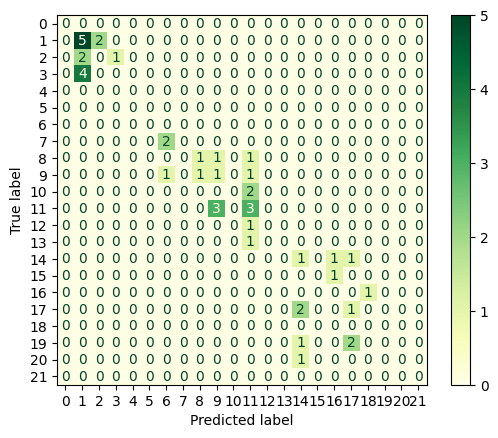

In [48]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=naive_bayes.classes_)
conf_matrix.plot(cmap=plt.cm.YlGn)
plt.show()

In [50]:
print(classification_report(y_test, pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.45      0.71      0.56         7
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         2
           8       0.50      0.33      0.40         3
           9       0.20      0.25      0.22         4
          10       0.00      0.00      0.00         2
          11       0.33      0.50      0.40         6
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.20      0.33      0.25         3
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.25      0.33      0.29         3
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         3
          20       0.00    

In [57]:
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy:.2f}')
# print(f'Accuracy: {:.2f}'.format(accuracy_score(y_test, pred)))

Accuracy: 0.27


In [61]:
specificity = tn / (fp + tn) if (fp + tn) != 0 else 0
fpr = fp / (tn + fp) if (tn + fp) != 0 else 0.0

print('Error Rate: ', (fp+fn)/(tp+tn+fp+fn))
print('Sensitivity (Recall or True Positive Rate): ', tp/(tp+fn))
print('Specificity (True Negative rate): ', specificity)
print('Precision (Positive predictive rate): ', tp/(tp+fp))
print('False Positive Rate: ', fpr) 

Error Rate:  0.0
Sensitivity (Recall or True Positive Rate):  1.0
Specificity (True Negative rate):  0
Precision (Positive predictive rate):  1.0
False Positive Rate:  0.0
